In [14]:
import numpy as np
import pandas as pd
from konlpy.tag import Twitter
import gensim
from gensim.models import word2vec
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import warnings; warnings.filterwarnings("ignore")

#### Dataset

In [16]:
mv= pd.read_csv('movie_review_merged.csv'); mv.iloc[:5]

,source,comment
0,1917,마지막저질주장면은영화사에남을장면.. 흔한전쟁영화인줄알았는데아니였고보는순간의몰입도가장...
1,강철비2,일본에서돈받았다고할때현웃터짐ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ여...
2,검객,이민혁미친ㅠㅠ 0:02여기에0.25배속하면민혁님보입니다:)이민혁보려고왔다가장혁씨한테...
3,결백,"신혜선연기쥰내잘함ㄹㅇ 두고보세요내가결백을증명할게..언니돌았나요ㅠㅠ사랑해,, 신혜선배..."
4,국제수사,오늘봤습니다ㄹㅇ리뷰간다재민없다그냥인터넷으로꽁으로보든가영화관가서보진마라후... 웃기지...


#### Tagging

In [17]:
file = open('stopwords.txt', encoding='UTF-8')
stopw = file.read(); stopw = stopw.split()
stop_add = ['', '발']
stopw = stopw+stop_add; print(stopw[0:10])

['아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라']


In [18]:
pos_tagger = Twitter()
mv_total = []
for p in mv['comment']:
    pos_mv = ['/'.join(i[:-1]) for i in pos_tagger.pos(p) if ((i[1]=='Noun') & (i[0] not in stopw)) & len(i) > 1]
    mv_total.append(' '.join(pos_mv))

In [19]:
mv_com = mv['comment']
def hash32(value):
     return hash(value) & 0xffffffff

In [20]:
doc_list = []
for doc in mv_com:
    tokens = [t for t in pos_tagger.nouns(doc) if len(t) > 1]
    doc_list.append(tokens)

#### Word2Vec

In [44]:
min_count = 1
hidden_size = 50 
workers = 1
window= 3
epoch = 30 

In [45]:
Td = [TaggedDocument(doc,["doc_%d" %i]) for i,doc in enumerate(doc_list)]
model = gensim.models.Word2Vec(doc_list, window = window, min_count=min_count, size = hidden_size, 
                               workers = workers, iter = epoch, seed=1, hashfxn=hash32)

In [24]:
X= model[model.wv.vocab]
model_df= pd.DataFrame(X)
model_df

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-0.613031,-0.515118,1.162694,-0.477873,-0.548007,-0.589547,-0.024446,0.216248,0.940935,-0.047577,...,-0.647158,0.242745,-0.582269,-0.231329,-1.500871,-0.328699,0.249042,-0.095957,0.145520,0.058863
1,-0.135964,-0.235491,0.433415,-0.047690,-0.054849,-0.200607,0.037544,0.051245,0.283481,-0.050154,...,-0.183183,0.083738,-0.304324,-0.002493,-0.443794,-0.063691,0.044831,-0.031176,0.053269,-0.005592
2,-0.856463,-1.241163,1.105284,-0.647719,-0.532137,-0.700131,-0.302757,0.618475,0.943593,-0.060175,...,-0.751114,0.490791,-0.351560,-0.441997,-1.638145,-0.475327,0.346664,-0.359634,0.072817,-0.243194
3,-0.092838,-0.188654,0.284190,-0.080625,-0.090251,-0.096217,-0.008578,0.013797,0.202539,-0.060184,...,-0.144001,0.045503,-0.166710,-0.023891,-0.366245,-0.063326,0.030581,-0.033979,0.036988,-0.003257
4,-0.137842,-0.309141,0.589371,-0.056540,-0.070198,-0.237150,0.050622,0.027963,0.364352,-0.080881,...,-0.243990,0.084425,-0.392662,-0.011131,-0.602943,-0.054812,0.057631,-0.033071,0.097499,0.000485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7977,-0.037392,-0.084025,0.170616,-0.005121,-0.011542,-0.060559,0.028595,-0.002332,0.104882,-0.036283,...,-0.069344,0.024662,-0.124416,0.013275,-0.171175,-0.014345,0.003105,0.004459,0.028002,0.001081
7978,-0.019798,-0.091022,0.179148,-0.021986,-0.003245,-0.055708,0.009778,0.005870,0.108378,-0.021401,...,-0.060780,0.015963,-0.124675,0.010683,-0.182875,-0.021225,0.014320,-0.012017,0.026273,0.017494
7979,-0.039098,-0.103929,0.175343,-0.007635,-0.013326,-0.083326,0.028685,-0.008292,0.122127,-0.016239,...,-0.071737,0.013257,-0.133546,0.006394,-0.194650,-0.027527,0.010797,-0.006582,0.024421,0.009893
7980,-0.015581,-0.057396,0.139023,-0.011446,0.008842,-0.063663,0.036164,-0.005983,0.082408,-0.025015,...,-0.052094,0.026462,-0.104660,0.016697,-0.095527,-0.014311,0.003276,0.000992,0.018289,0.006296


In [25]:
vocab = list(model.wv.vocab)
X = model[vocab]

In [26]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X[:200,:])

In [27]:
vc = pd.DataFrame(X_tsne, index=vocab[:200], columns=['x', 'y'])
vc

,x,y
마지막,12.188663,6.783708
질주,-4.953311,-1.324432
장면,12.721389,7.376929
영화사,-7.697777,-2.528340
전쟁영화,-1.862182,0.424064
...,...,...
쿠데타,-7.565531,-5.059610
이유,11.067862,5.369219
독도,-3.689553,-2.790571
미국,9.056424,1.114500


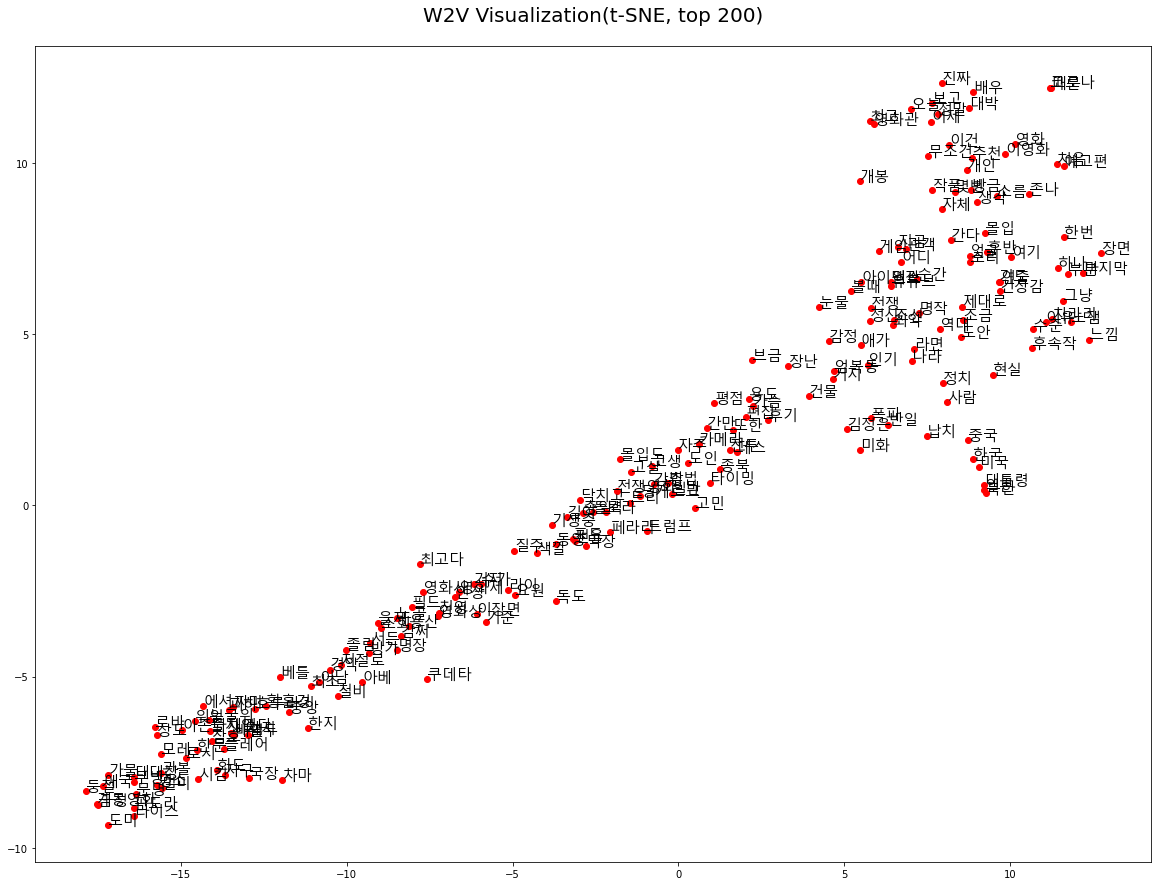

In [28]:
fig = plt.figure()
fig.set_size_inches(20, 15)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(vc['x'], vc['y'], c='r')
plt.title('W2V Visualization(t-SNE, top 200)', size=20, pad=25)
plt.rc('font', family='Malgun Gothic')
for word, pos in vc.iterrows():
    ax.annotate(word, pos, fontsize=15)
plt.show()

#### Doc2Vec

In [29]:
Td = [LabeledSentence(doc,["doc_%d" %i]) for i,doc in enumerate(doc_list)]
d2v = Doc2Vec(Td, window = window, min_count=min_count, size = hidden_size, workers = workers, 
                     iter = epoch, seed=1, hashfxn=hash32)

In [31]:
Td[0]

LabeledSentence(words=['마지막', '질주', '장면', '영화사', '장면', '전쟁영화', '순간', '몰입도', '장난', '영화', '몇번', '소름', '간만', '영화제', '질주', '배우', '고생', '느낌', '저절로', '얼굴', '진짜', '보고', '진짜', '영화', '도미', '배우', '기도', '용산', '아이맥스', '중앙', '지금', '영화관', '마지막', '라이스', '장면', '보고', '한번', '영화', '한번', '제대로', '진짜', '최고다', '전쟁', '진짜', '브금', '진짜', '소름', '마지막', '대대장', '애가', '느낌', '이장면', '진짜', '소름', '이건', '진짜', '로바', '진짜', '장면', '에셔', '후반', '돌격', '정말', '영화상', '이남', '명장', '전쟁', '누굴위', '진짜', '마지막', '고민', '눈물', '무조건', '아이맥스', '진짜', '몰입', '영화', '편집', '부분', '장면', '몰입', '장난', '하나', '도안', '졸림', '몰입', '방금', '진짜', '강추', '전투', '장면', '몰입', '감쩌', '전쟁영화', '처음', '을제', '기생충', '대박', '긴장감', '카메라', '무빙', '연출', '수준', '사람', '멀미', '자주', '사람', '조금', '염두', '마지막', '질주', '도인', '시가지', '총알', '피하', '장면', '또한', '인상', '예고편', '최초', '개봉', '한국', '개봉', '한지', '코로나', '때문', '영화관', '고살', '유튜브', '어디', '서든', '플레어', '황홀경', '자체', '무조건', '짜미', '친영', '긴장감', '개인', '덩케르크', '용도', '로시', '가슴', '아이맥스', '영화', '추천', '코로나', '이영화', '기준', '전쟁영화', '역대', '위임', '데스', '장면', '감정', '

In [37]:
doc_tags = list(d2v.docvecs.doctags.keys())
print(doc_tags)
X = d2v[doc_tags]
d2v_df= pd.DataFrame(X)

['doc_0', 'doc_1', 'doc_2', 'doc_3', 'doc_4', 'doc_5', 'doc_6', 'doc_7', 'doc_8', 'doc_9', 'doc_10', 'doc_11', 'doc_12', 'doc_13', 'doc_14', 'doc_15', 'doc_16', 'doc_17', 'doc_18', 'doc_19', 'doc_20', 'doc_21', 'doc_22', 'doc_23', 'doc_24', 'doc_25', 'doc_26', 'doc_27', 'doc_28', 'doc_29', 'doc_30', 'doc_31', 'doc_32', 'doc_33', 'doc_34']


In [39]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

In [40]:
title_list= np.unique(mv['source'].values); title_list

array(['1917', '강철비2', '검객', '결백', '국제수사', '그린랜드', '나쁜녀석들포에버', '남산의 부장들',
       '내가죽던날', '다만악에서구하소서', '담보', '도굴', '뮬란', '미스터주', '미스터트롯', '반도',
       '버즈오브프레이', '사라진시간', '살아있다', '삼진그룹영어토익반', '소리도없이', '스타워즈',
       '스파이지니어스', '오문희', '온워드', '이웃사촌', '인비저블맨', '작은아씨들', '정직한후보',
       '지푸라기라도잡고싶은짐승들', '침입자', '클로젯', '테넷', '해치지않아', '히트맨'], dtype=object)

In [41]:
dv = pd.DataFrame(X_tsne, index=title_list, columns=['x', 'y'])
dv

,x,y
1917,60.237003,-11.125085
강철비2,68.916664,-133.411591
검객,-9.197721,-18.989388
결백,38.958748,14.741504
국제수사,-45.284115,-20.301174
그린랜드,-44.184185,94.204071
나쁜녀석들포에버,-78.122955,-31.906759
남산의 부장들,77.127556,-83.177101
내가죽던날,-30.115677,11.674129
다만악에서구하소서,-105.399063,63.371536


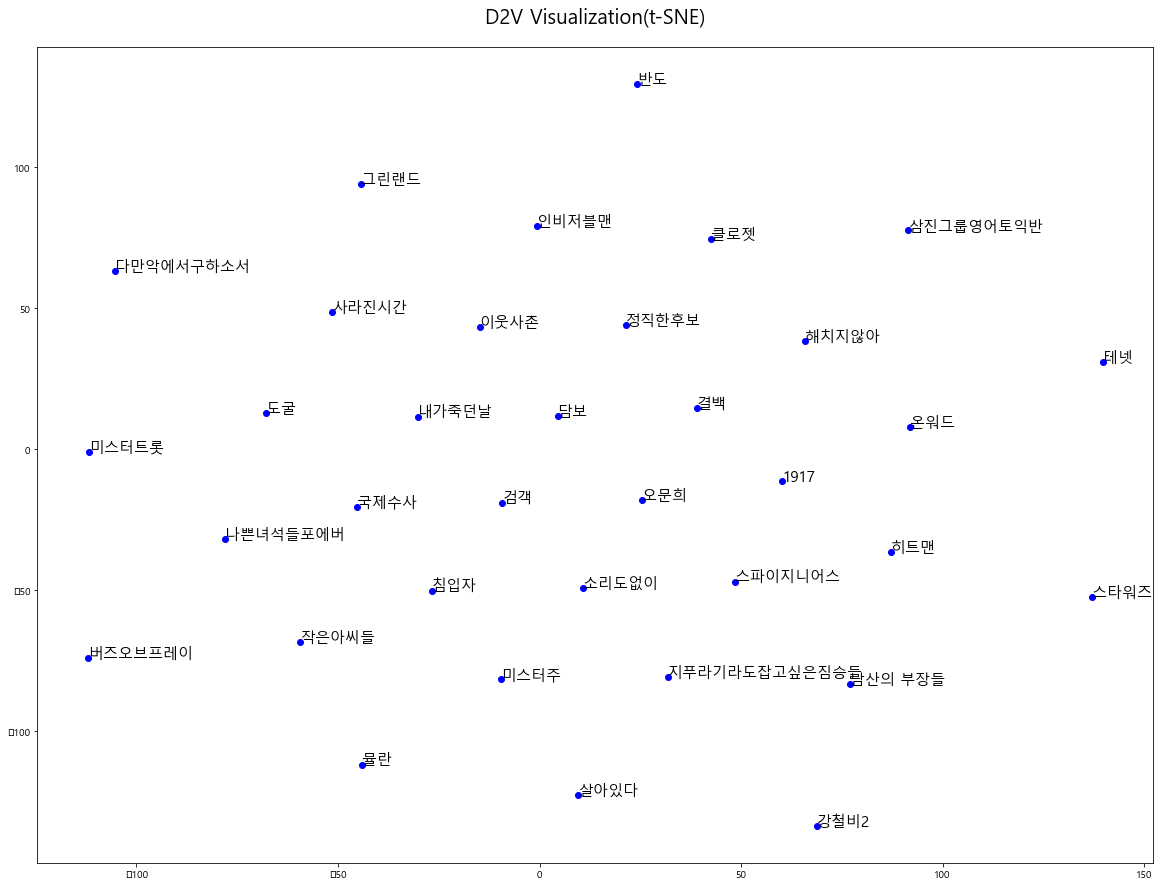

In [42]:
fig = plt.figure()
fig.set_size_inches(20, 15)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(dv['x'], dv['y'], c='blue')
plt.title('D2V Visualization(t-SNE)', size=20, pad=25)
plt.rc('font', family='Malgun Gothic')
for word, pos in dv.iterrows():
    ax.annotate(word, pos, fontsize=15)
plt.show()